In [508]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import math as mymath
from scipy import stats

In [509]:
file = "C:/Users/ppbin/OneDrive/Desktop/Ak Data Analytics23/Datascience/titanic_dataset.csv"
data= pd.read_csv(file) #reading file

In [510]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [511]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [512]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [513]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [514]:
# passenger id as index column
data.set_index('PassengerId', inplace=True)

In [515]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [516]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [517]:
# check for missing values
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

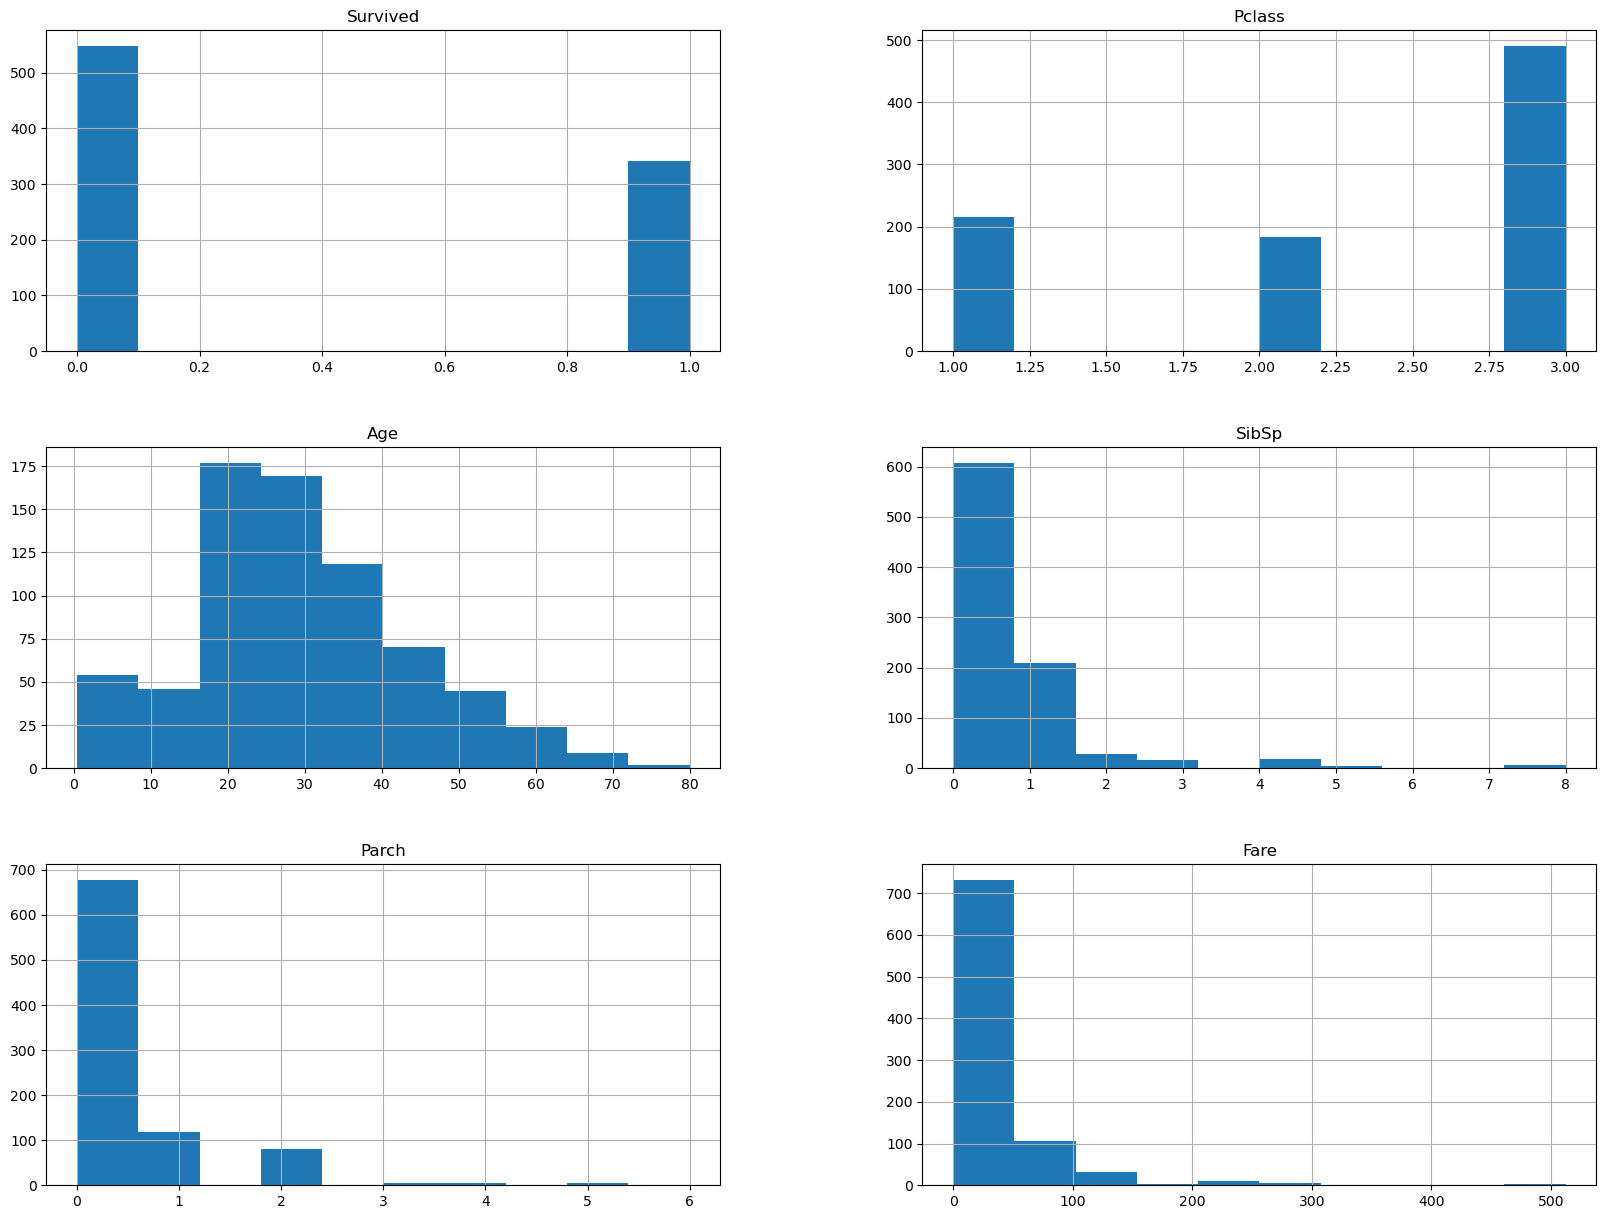

In [518]:
data.hist(figsize=(20,15))
plt.show()


In [519]:
# replacing missing values using median
for i in ['Age']:
    data[i]= data[i].fillna(data[i].median())

In [520]:
for i in ['Cabin','Embarked']:
    data[i]= data[i].fillna(data[i].mode()[0])

In [521]:
# check for missing values
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

<Axes: >

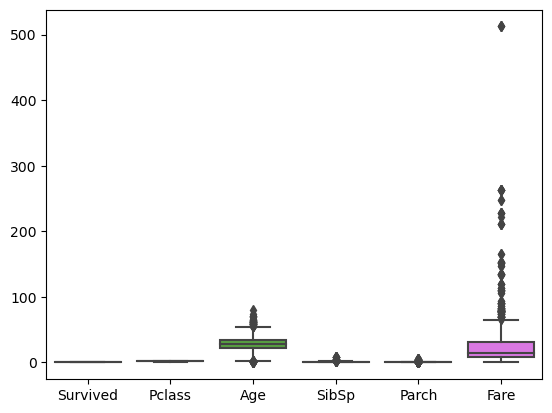

In [522]:
#  boxplot of titanic dataset
sns.boxplot( palette="husl", data=data)

In [523]:
box=data.select_dtypes(include=['float','int'])
box.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [524]:
# removing outliers
for i in ['SibSp', 'Parch', 'Fare']:
    Q1= np.percentile(data[i],25, interpolation='midpoint')
    Q2= np.percentile(data[i],50, interpolation='midpoint')
    Q3= np.percentile(data[i],75, interpolation='midpoint')
    if Q2== data[i].median():
        IQR= Q3-Q1
        low_lim= Q1-1.5*IQR
        up_lim= Q3+1.5*IQR
        outlier =[]
        for x in data[i]:
            if(x<low_lim)or (x>up_lim):
                outlier.append(x)
        ind2= data[i]>up_lim
        ind3= data[i]<low_lim
        indicestodrop2= data.loc[ind2].index
        indicestodrop3= data.loc[ind3].index
        data= data.drop(indicestodrop2)
        data= data.drop(indicestodrop3)
    else:
        print('check again')
data.shape


C:\Users\ppbin\AppData\Local\Temp\ipykernel_13212\3121906927.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1= np.percentile(data[i],25, interpolation='midpoint')
C:\Users\ppbin\AppData\Local\Temp\ipykernel_13212\3121906927.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2= np.percentile(data[i],50, interpolation='midpoint')
C:\Users\ppbin\AppData\Local\Temp\ipykernel_13212\3121906927.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'mi

(591, 11)

In [525]:
data.drop('Cabin',axis=1,inplace=True)

In [526]:
#exploratory data analysis

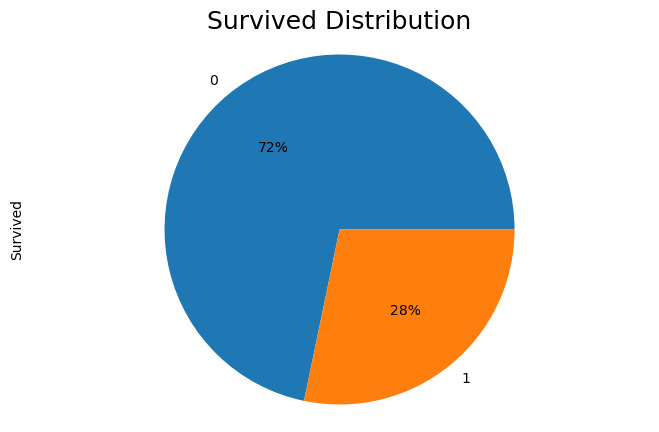

In [527]:
# Visualize the distribution of survived
plt.figure(figsize=(8,5))
data.Survived.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.axis('equal')
plt.title("Survived Distribution", fontsize='18')
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

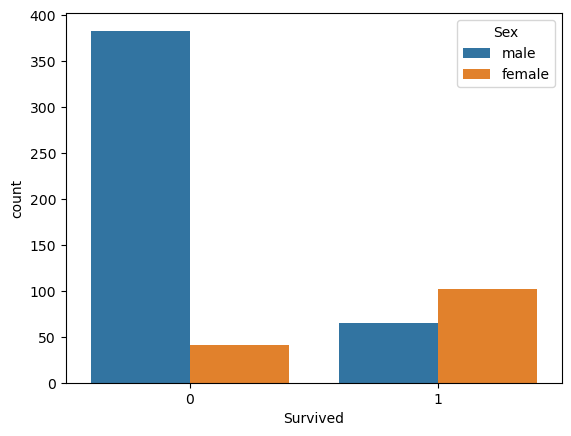

In [528]:
sns.countplot(data,x='Survived',hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

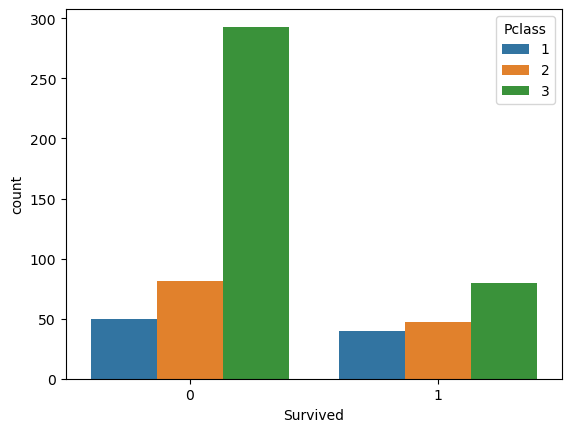

In [529]:
sns.countplot(data,x='Survived',hue='Pclass')

C:\Users\ppbin\AppData\Local\Temp\ipykernel_13212\2333317778.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2['Age'].dropna(),kde=False,color='darkred',bins=30)


<Axes: xlabel='Age'>

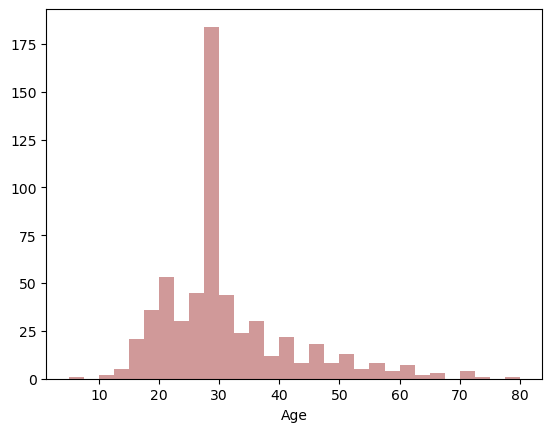

In [530]:
sns.distplot(data2['Age'].dropna(),kde=False,color='darkred',bins=30)

<Axes: xlabel='SibSp', ylabel='count'>

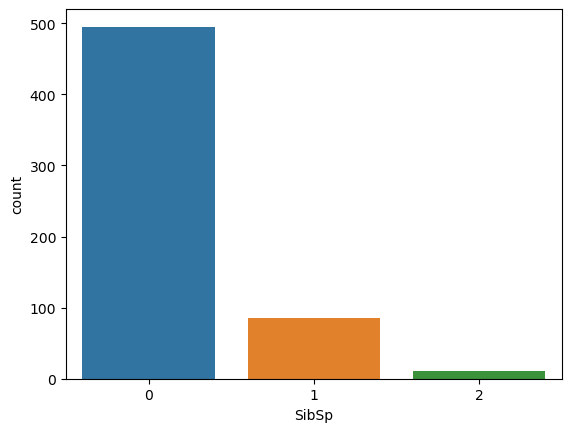

In [531]:
sns.countplot(x='SibSp',data=data)

<Axes: xlabel='Pclass', ylabel='Age'>

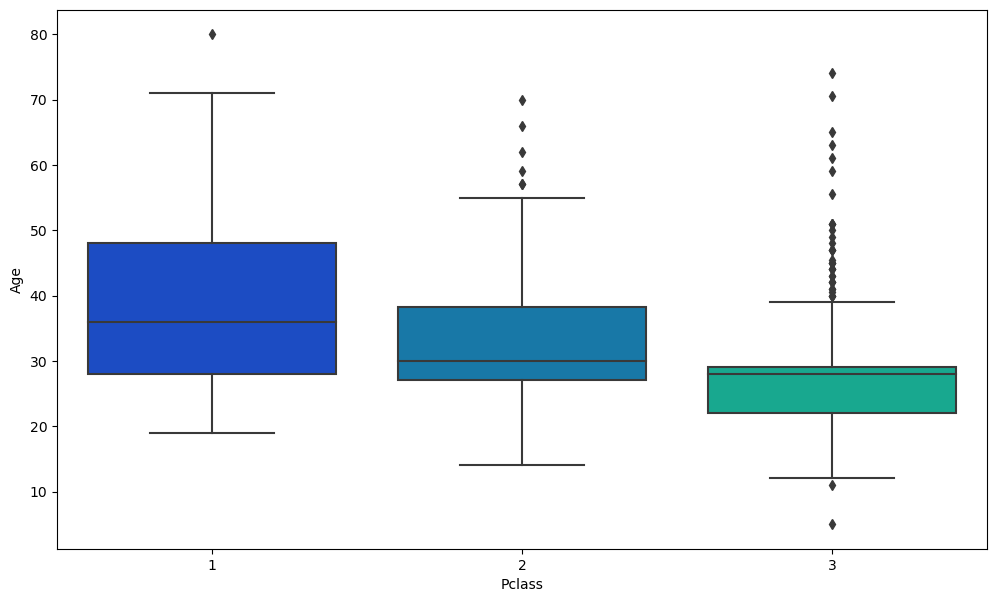

In [532]:
plt.figure(figsize=(12, 7))
sns.boxplot(data, x='Pclass',y='Age',palette='winter')

<Axes: >

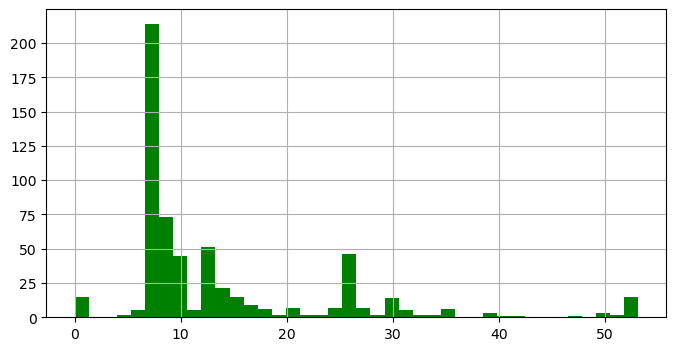

In [533]:
data['Fare'].hist(color='green',bins=40,figsize=(8,4))

In [535]:
data['Name'].nunique()

591

In [536]:
data['Ticket'].nunique()

549

In [537]:
data['Embarked'].nunique()

3

In [538]:
#now drop and create dummies
sex = pd.get_dummies(data['Sex'],drop_first=True)
embark = pd.get_dummies(data['Embarked'],drop_first=True)

In [539]:
#now drop and create dummies
data.drop(['Sex','Embarked','Name','Ticket','Parch'],axis=1,inplace=True)


In [540]:
data2 = pd.concat([data,sex,embark],axis=1)

In [541]:
data2.head

<bound method NDFrame.head of              Survived  Pclass   Age  SibSp     Fare  male  Q  S
PassengerId                                                    
1                   0       3  22.0      1   7.2500     1  0  1
3                   1       3  26.0      0   7.9250     0  0  1
4                   1       1  35.0      1  53.1000     0  0  1
5                   0       3  35.0      0   8.0500     1  0  1
6                   0       3  28.0      0   8.4583     1  1  0
...               ...     ...   ...    ...      ...   ... .. ..
885                 0       3  25.0      0   7.0500     1  0  1
887                 0       2  27.0      0  13.0000     1  0  1
888                 1       1  19.0      0  30.0000     0  0  1
890                 1       1  26.0      0  30.0000     1  0  0
891                 0       3  32.0      0   7.7500     1  1  0

[591 rows x 8 columns]>

In [542]:
data2.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Fare', 'male', 'Q', 'S'], dtype='object')

In [471]:
data2.info

<bound method DataFrame.info of              Survived  Pclass   Age  SibSp     Fare  male  Q  S
PassengerId                                                    
1                   0       3  22.0      1   7.2500     1  0  1
3                   1       3  26.0      0   7.9250     0  0  1
4                   1       1  35.0      1  53.1000     0  0  1
5                   0       3  35.0      0   8.0500     1  0  1
6                   0       3  28.0      0   8.4583     1  1  0
...               ...     ...   ...    ...      ...   ... .. ..
885                 0       3  25.0      0   7.0500     1  0  1
887                 0       2  27.0      0  13.0000     1  0  1
888                 1       1  19.0      0  30.0000     0  0  1
890                 1       1  26.0      0  30.0000     1  0  0
891                 0       3  32.0      0   7.7500     1  1  0

[591 rows x 8 columns]>

In [472]:
data2['Survived'].value_counts()

0    424
1    167
Name: Survived, dtype: int64

In [473]:
y = data2['Survived']
X = data2.drop('Survived', axis=1)

In [474]:
X

,Pclass,Age,SibSp,Fare,male,Q,S
PassengerId,,,,,,,
1,3,22.0,1,7.2500,1,0,1
3,3,26.0,0,7.9250,0,0,1
4,1,35.0,1,53.1000,0,0,1
5,3,35.0,0,8.0500,1,0,1
6,3,28.0,0,8.4583,1,1,0
...,...,...,...,...,...,...,...
885,3,25.0,0,7.0500,1,0,1
887,2,27.0,0,13.0000,1,0,1
888,1,19.0,0,30.0000,0,0,1


In [475]:
y 



PassengerId
1      0
3      1
4      1
5      0
6      0
      ..
885    0
887    0
888    1
890    1
891    0
Name: Survived, Length: 591, dtype: int64

In [476]:
from sklearn.model_selection import train_test_split

In [477]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [478]:
# after encoded data fit  logistic regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred
#R square should be close to 1, mse should be minimum
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

C:\Users\ppbin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[92, 15],
       [15, 26]], dtype=int64)

In [494]:
X_test.shape

(148, 7)

In [480]:
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score

In [481]:
print(precision_score(y_test,y_pred))

0.6341463414634146


In [482]:
print(f1_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

0.6341463414634146
0.6341463414634146
0.7972972972972973


In [483]:
#kNN 
from sklearn.neighbors import KNeighborsClassifier

In [484]:
metric_k = []
neighbors = np.arange(3, 15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    metric_k.append(acc)

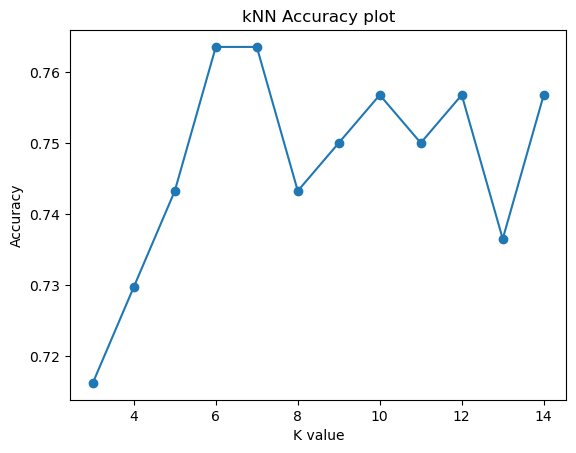

In [485]:
plt.plot(neighbors,metric_k, 'o-')
plt.title('kNN Accuracy plot')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.show()

In [486]:
classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [487]:
accuracy_score(y_test,y_pred)

0.7635135135135135

In [488]:
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [489]:
accuracy_score(y_test,y_pred)

0.7635135135135135

In [493]:
confusion_matrix(y_test, y_pred)

array([[99,  8],
       [27, 14]], dtype=int64)

In [490]:
X.columns

Index(['Pclass', 'Age', 'SibSp', 'Fare', 'male', 'Q', 'S'], dtype='object')

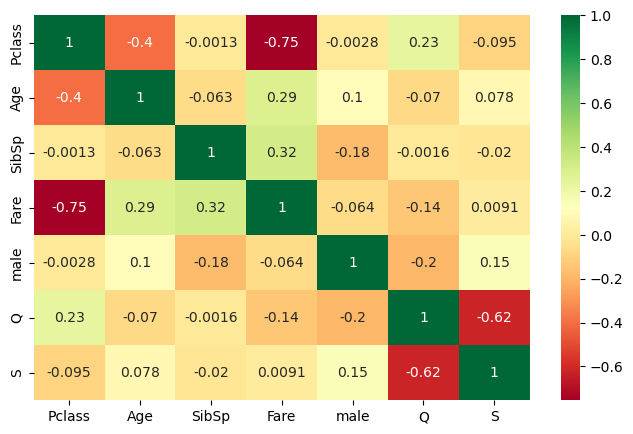

In [492]:
Selected_features = ['Pclass', 'Age', 'SibSp', 'Fare', 'male', 'Q', 'S']
X = data2[Selected_features]
plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()


In [435]:
data2['Parch'].value_counts()

0    591
Name: Parch, dtype: int64